## Messari standardised subgraphs

https://github.com/messari/subgraphs

### Curve
https://api.thegraph.com/subgraphs/name/messari/curve-finance-ethereum

Price impact still to go https://curve.fi/pools 

In [1]:
import pandas as pd
import numpy as np
import time
import requests
import datetime as dt

In [2]:
endpoint = 'https://api.thegraph.com/subgraphs/name/messari/curve-finance-ethereum'

In [3]:
#Check if subgraph is up to date
query = """{
  _meta{
    block{
      timestamp
  		hash
      number
    }
    hasIndexingErrors
    deployment
  }
}"""
request = requests.post(endpoint, json={'query':query})
data = request.json()
#Check if it is ok to run i.e. within 5 days of today
int(data['data']['_meta']['block']['timestamp'], base = 0) > (dt.datetime.today().timestamp() - 3600*24*5)

True

6-Month Average Daily Volume

In [12]:
query = """{
  financialsDailySnapshots(first: 183, orderBy: timestamp, orderDirection: desc){
    id
    protocol{
      name
    }
    dailyVolumeUSD
    dailyTotalRevenueUSD
    dailySupplySideRevenueUSD
    dailyProtocolSideRevenueUSD
    timestamp
    blockNumber
  }
}
"""

In [16]:
request = requests.post(endpoint, json={'query':query})
data = request.json()

In [17]:
df = pd.json_normalize(data['data']['financialsDailySnapshots'])

In [19]:
df

,id,dailyVolumeUSD,dailyTotalRevenueUSD,dailySupplySideRevenueUSD,dailyProtocolSideRevenueUSD,timestamp,blockNumber,protocol.name
0,19241,63953529.1983240680467470699088795,5667342643.59983616652373031877684,-453519616762.98195676439176596191035,459186959406.5817929309154962806956,1662463653,15483804,Curve Finance
1,19240,180723105.3570894084783201945721675,11617613034.40324617238818272964824,-828172613354.7162783373946937702737,839790226389.1195245097828764999398,1662422389,15480812,Curve Finance
2,19239,255209250.9877253072500717994123835,13765393683.91001448228377005288551,-272504606471.65476922538507022757477,286270000155.564783707668840280464,1662335939,15474636,Curve Finance
3,19238,255264534.326985976096079660327866,14202191048.83626307894849195714318,-385864178918.44317622861782478095896,400066369967.279439307566316738116,1662249592,15468372,Curve Finance
4,19237,127866376.0944051520337753294361575,9585523402.543442070965284389169554,-245843257901.54698762060101181154743,255428781304.0904296915662962007278,1662163197,15462172,Curve Finance
...,...,...,...,...,...,...,...,...
178,19063,135274164.4721357972456793281022001,10622339146.62630645780810500801275,10622239290.60954667004586500949309,99856.0167597877622399985196939714,1647129582,14375063,Curve Finance
179,19062,218537457.8981477169702204606414888,8344833002.262197304771711564850899,8344680721.527068149494224115301112,152280.7351291552774874495497829938,1647043197,14368558,Curve Finance
180,19061,215857937.267390180759119421091929,7874073567.329927322952745192783299,7873904416.653502918365055961631827,169150.6764244045876892311514635521,1646956794,14362227,Curve Finance
181,19060,211739079.8996931862952794846894541,7589438604.846651889985580446222043,7589202680.627575574616392384463863,235924.2190763153691880617581672264,1646870384,14355747,Curve Finance


<AxesSubplot:>

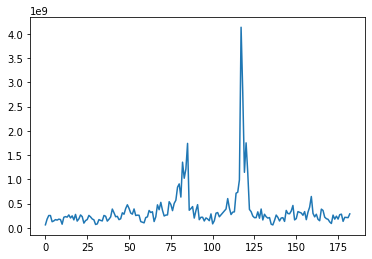

In [30]:
df['dailyVolumeUSD'].loc[~df.index.isin(df['dailyVolumeUSD'].astype(float).nlargest(3).index)].astype(float).plot()

In [31]:
df['dailyVolumeUSD'].loc[~df.index.isin(df['dailyVolumeUSD'].astype(float).nlargest(3).index)].astype(float).mean()

351662037.95136976

6-Month Average TVL

In [32]:
#DefiLlama https://defillama.com/protocols/dexes 
lma = pd.read_csv("https://api.llama.fi/dataset/curve.csv")

/tmp/ipykernel_94747/258029385.py:2: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,

In [33]:
lma

,Unnamed: 0,Date,Timestamp,Curve,Curve.1,Curve.2,Curve.3,Curve.4,Curve.5,Curve.6,...,Curve.1375,Curve.1376,Curve.1377,Curve.1378,Curve.1379,Curve.1380,Curve.1381,Curve.1382,Curve.1383,Curve.1384
0,NaN,NaN,NaN,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,...,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes,Dexes
1,NaN,NaN,NaN,optimism,Total,harmony,moonbeam,ethereum,aurora,xdai,...,fantom,fantom,fantom,fantom,fantom,fantom,fantom,fantom,fantom,staking
2,NaN,NaN,NaN,TVL,TVL,TVL,TVL,TVL,TVL,TVL,...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,KUSD,L3USD,RENUSDT,APUSDTEST,RENUSDC,LNWFTM,LAMBDA,AXLDAI,RENBUSD,CRV
4,NaN,09/02/2020,1.581206e+09,NaN,1163733.163555646,NaN,NaN,1163733.163555646,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,NaN,02/09/2022,1.662077e+09,35611392.569279,5812198043.40439,0.0,21947226.108081,5335327688.818572,17092.144486,92539464.513699,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583527161.451399
941,NaN,03/09/2022,1.662163e+09,36690414.443305,5759088482.887787,0.0,22541687.492873,5279256412.557721,17100.667336,92414203.130165,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583610543.340304
942,NaN,04/09/2022,1.662250e+09,37325642.697224,5753400437.804317,0.0,22584452.761968,5273430888.495433,17100.656737,92390765.850391,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583672963.762658
943,NaN,05/09/2022,1.662336e+09,37602873.352332,5769220618.243981,0.0,23464062.169653,5289259496.167113,17107.531169,91401602.820968,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,583860067.514188


In [37]:
#Just eth currently can take total by changing the header
lma.iloc[-183:, 7].astype(float).mean()

9765334278.417078

Largest Pool Concentration

In [38]:
df = pd.DataFrame()
ts = 0

while True:
    sl = len(df)
    query = """
{
  liquidityPools(first:1000, orderBy: createdTimestamp, orderDirection: asc, where: {createdTimestamp_gt: """+f'"{ts}"'+"""}){
    id
    name
    totalValueLockedUSD
    cumulativeVolumeUSD
    createdTimestamp
    createdBlockNumber
  }
}
"""
    request = requests.post(endpoint, json={'query':query})
    data = request.json()

    pool = pd.json_normalize(data['data']['liquidityPools'])
    df = df.append(pool)
    df.drop_duplicates(inplace=True)
    if len(df) == sl:
      break
    ts = df['createdTimestamp'].max()


/tmp/ipykernel_94747/2291472997.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pool)


In [39]:
df

,id,name,totalValueLockedUSD,cumulativeVolumeUSD,createdTimestamp,createdBlockNumber
0,0x52ea46506b9cc5ef470c5bf89f17dc28bb35d85c,Curve.fi cDAI/cUSDC/USDT,165780.31990530838463,171537573.5040815154398987840728015,1581368210,9457457
1,0x45f783cce6b7ff23b2ab2d70e416cdb7d6055f51,Curve.fi yDAI/yUSDC/yUSDT/yTUSD,10665343.660927145589065359613531,1687558399.688310780473770709461219,1581621738,9476528
2,0x79a8c46dea5ada233abaffd40f3a0a2b1e5a4f27,Curve.fi yDAI/yUSDC/yUSDT/yBUSD,6836379.968789231703742199968302,472885409.759649637177542642725591,1582828737,9567303
3,0xa2b47e3d5c44877cca798226b7b8118f9bfb7a56,Curve.fi cDAI/cUSDC,64669601.65334127646541,610473787.098836644425771978867299,1582834923,9567758
4,0xa5407eae9ba41422680e2e00537571bcc53efbfd,Curve.fi DAI/USDC/USDT/sUSD,118832453.094330377036486005275842,18686563374.45361925877532557730921,1587351926,9906835
...,...,...,...,...,...,...
307,0x21d158d95c2e150e144c36fc64e3653b8d6c6267,Curve.fi Factory Crypto Pool: cvxFxs/FraxBP,0,0,1662206304,15465253
308,0xbec570d92afb7ffc553bdd9d4b4638121000b10d,Curve.fi Factory Crypto Pool: CVX/FraxBP,64245.059284677057314603628091,720.9250769756850009472580545,1662207185,15465318
309,0x4149d1038575ce235e03e03b39487a80fd709d31,Curve.fi Factory Crypto Pool: ALCX/FraxBP,85213.44840105534326921058164,1385.60811134573892028922533,1662208869,15465436
310,0x31c325a01861c7dbd331a9270296a31296d797a0,Curve.fi Factory Crypto Pool: cvxCrv/FraxBP,37929.260127048134857598153016,1183.14619328421295375217034,1662259990,15469163


In [40]:
df['totalValueLockedUSD'].astype(float).max()/df['totalValueLockedUSD'].astype(float).sum()

0.19956713640689164

In [41]:
df['totalValueLockedUSD'].astype(float).nlargest(10).sum()/df['totalValueLockedUSD'].astype(float).sum()

0.7984955651300448

Liquidity Pools with > $1mn TVL

In [42]:
len(df.loc[df['totalValueLockedUSD'].astype(float) > 1000000])

78

Monthly Active Users

In [43]:
query = """{
  usageMetricsDailySnapshots(first: 183, orderBy: timestamp, orderDirection: desc){
    timestamp
    blockNumber
    id
    dailyActiveUsers
    dailySwapCount
    dailyDepositCount
    dailyWithdrawCount 
  }
}
"""

In [44]:
request = requests.post(endpoint, json={'query':query})
data = request.json()

In [45]:
df = pd.json_normalize(data['data']['usageMetricsDailySnapshots'])

In [47]:
df['dailyActiveUsers'].mean()

556.0382513661202

Implied slippage